In [ ]:
import torch

In [ ]:
X = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
limit = int(input())

larger_than_limit_sum = (X[X > limit]).sum()

print(larger_than_limit_sum)

 8


tensor(9)


# Неделя 2. Строим первую нейронную сеть

2.6 Семинар: Реализация градиентного спуска (часть 1)

In [ ]:
import torch

Допустим, у нас есть функция f(x)=loge(x +3)f(x) = log_{e}(x + 3)f(x)=loge​(x +3). Мы выбрали начальное приближение xt=0 =7x^{t=0} = 7xt=0 =7 . И шаг градиентного спуска α=10\alpha=10α=10

Чему будет равен xt=1x^{t=1}xt=1? 

In [ ]:
x = torch.tensor(7.0, requires_grad=True)
f = torch.log(x + 3)
f.backward()
lr = 10
x.data = x.data - lr * x.grad.data
print(x.data)

tensor(6.)


Допустим, у нас есть функция f(X)=∑loge(xij+1)f(X) = \sum{log_{e}(x_{ij} + 1)}f(X)=∑loge​(xij​+1), где XXX - тензор размера 2x2. Мы выбрали начальное приближение Xt=0 =[[1,2],[4,5]]X^{t=0} = [[1, 2], [4, 5]]Xt=0 =[[1,2],[4,5]] . И шаг градиентного спуска α=10\alpha=10α=10

Чему будет равен Xt=1X^{t=1}Xt=1? 

In [ ]:
X = torch.tensor([[1.0, 2.0], [4.0, 5.0]], requires_grad=True)
f = torch.log(X + 1).sum()
f.backward()
lr = 10
X.data = X.data - lr * X.grad.data
print(X.data)

tensor([[-4.0000, -1.3333],
        [ 2.0000,  3.3333]])


Реализуйте расчет градиента для функции f(w)=∏i,jloge(loge(wi,j +7))f(w) = \prod\limits_{i,j}{log_{e}(log_{e}({w_{i,j} + 7}}))f(w)=i,j∏​loge​(loge​(wi,j​ +7)) в точке w =[[5,10],[1,2]]w = [[5, 10], [1, 2]]w =[[5,10],[1,2]]

Подсказка: перемножить все значения функции можно с помощью метода .prod()

In [ ]:
w = torch.tensor([[5.,10.],
                  [1.,2.]], requires_grad=True)

#######
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
w = w.to(device)
#######

function = torch.log(torch.log(w + 7)).prod()
#function = (w+7).log().log().prod()

function.backward()

print(w.grad, '<- gradient')

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]]) <- gradient


# Неделя 3. Задачи решаемые при помощи нейронных сетей

**3.4 Теоретические задачи: Функции потерь**

Пусть имеется монетка, которую мы подбрасывали NNN раз, и MMM раз монетка выпала орлом вверх. Мы будем восстанавливать вероятность выпадения орла ppp при помощи минимизации бинарной кросс-энтропии:

p~=arg⁡min⁡p∑i=1N(−tilog⁡p−(1−ti)log⁡(1−p)),\tilde{p} = \arg\min_p \sum_{i=1}^N \left( - t_i \log p - (1 - t_i) \log(1 - p) \right),
p~​=argpmin​i=1∑N​(−ti​logp−(1−ti​)log(1−p)),где arg⁡min⁡xf(x)\arg\min_x f(x)argminx​f(x) -- значение xxx, при котором fff минимальна, ti=1t_i = 1ti​=1 в том случае, когда выпал орел и ti=0t_i = 0ti​=0 в том случае, когда выпала решка.

In [ ]:
import sympy as sp

p, n, m = sp.symbols("p n m")
expr = -(m * sp.log(p) + (n-m) * sp.log(1-p)) # расписали сумму
diff_expr = expr.diff(p) # производная
sp.solve(diff_expr, 0, p) # решение

[{p: m/n}]

**3.5 Семинар: Строим первую нейронную сеть**

Давайте попрактикуемся с SineNet:

1) Добавим еще один fc-слой

2) Заменим активацию между слоями на гиперболический тангенс

In [ ]:
#было
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

SyntaxError: ignored

In [ ]:
#Решение
import torch

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

sine_net = SineNet(int(input()))
sine_net.forward(torch.Tensor([1.]))

print(sine_net)

20
SineNet(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


3.5.6 Семинар: Строим первую нейронную сеть

Обучим нейронную сеть для задачи регрессии:

Возьмем более сложную функцию в качестве таргета: y=2xsin(2−x)y=2^x sin(2^{-x})y=2xsin(2−x).

Кроме того, мы хотим получить хорошую метрику MAE на валидации: MAE=1l∑i=1l∣y_predi−y_targeti∣{MAE} = {\frac {1}{l}}\sum _{i=1}^{l}{|y\_pred_{i}-{y\_target_{i}}|}MAE=l1​∑i=1l​∣y_predi​−y_targeti​∣, тогда как знакомая нам MSE выглядит как MSE=1l∑i=1l(y_predi−y_targeti)2{MSE} = {\frac {1}{l}}\sum _{i=1}^{l}(y\_pred_{i}-{y\_target_{i}})^{2} MSE=l1​∑i=1l​(y_predi​−y_targeti​)2

Вот пример того, как нейросеть может отрабатывать на данной функции:

Данный пример показывает MAE на валидации ~0.021 . Получите метрику не хуже 0.03

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = RegressionNet(100)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    return ((pred - target) ** 2).mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

#Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
# (раскомментируйте, если решаете задание локально)

0.02329946681857109


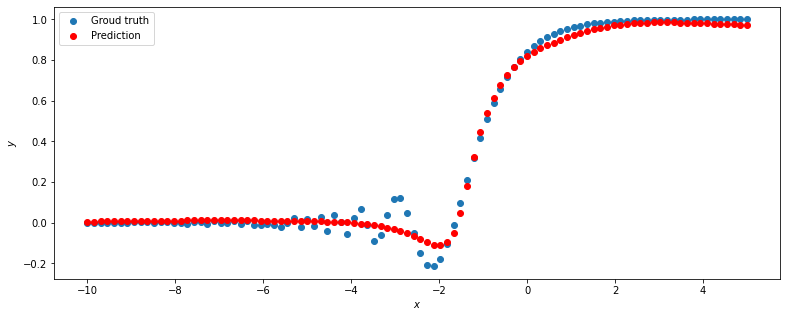

In [ ]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, x_validation, y_validation)

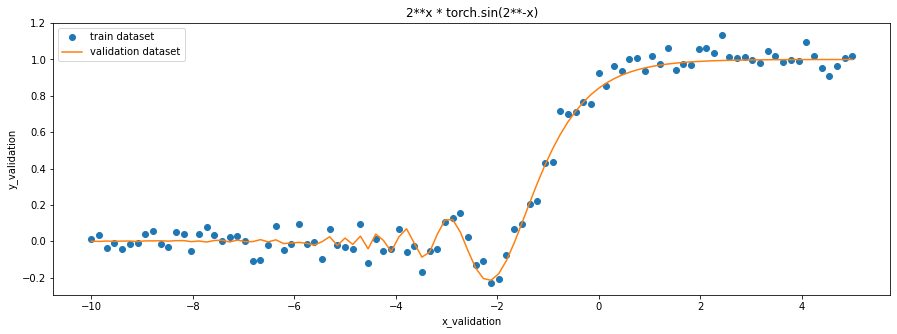

In [ ]:
#решение от https://stepik.org/lesson/236236/step/15?discussion=1641231&thread=solutions&unit=208641
import torch
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

# Создание набора тренировочных и тестовых данных
def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

# Визуализация подготовленных данных
plt.plot(x_train.numpy(), y_train.numpy(), 'o', label='train dataset')
# Визуализация тестовых данных
plt.plot(x_validation.numpy(), y_validation.numpy(), '-', label='validation dataset')
# Визуализация валидационных данных
plt.title('2**x * torch.sin(2**-x)')
plt.legend(loc='upper left')
plt.xlabel('x_validation')
plt.ylabel('y_validation')
plt.show()

In [ ]:
# Функция оценки качества работы неросейти
def metric(pred, target):
    return (pred - target).abs().mean()

# Создание класса нейросети L-S-L-S-L (два скрытых слоя нейронов)
class RegressionNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(RegressionNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

  # Функция определяющая последовательность применения слоев. x - это входное значение.
  # значение x последовательно обрабатывается слоями и активационными функциями.
  def forward(self, x):                               
    x = self.fc1(x)                                   
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

# Создаем экземпляр класса нейросети
net = RegressionNet(5)

# Задаем оптимизатор для нейросети
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Задаем фенкцию потерь
def loss(pred, target):
  # mae = abs(pred - target)
  # return mae.mean()
  squares = (pred - target) ** 2
  return squares.mean()

При обучении нейросети записывается история изменения функции потерь (loss функции)
и при завершении обучения сети выводиться график это функции.
Таким образом можно визуализировать процесс обучения сети, наблюдать как меняется ошибка в процессе обучения.

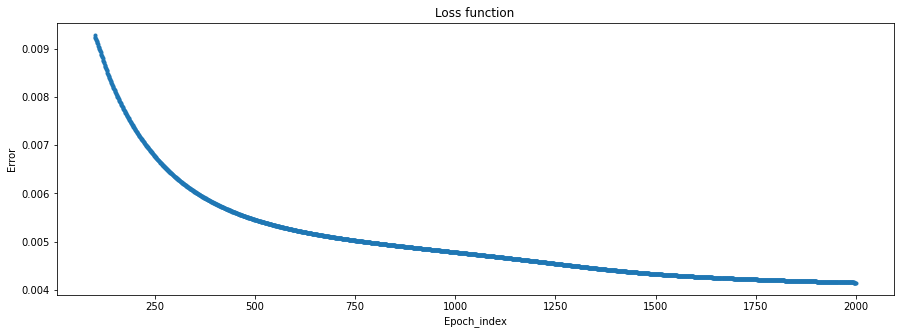

In [ ]:
epoch_num = 2000
loss_history = [[0,0] for i in range(epoch_num)]

for epoch_index in range(epoch_num):
  optimizer.zero_grad()

  y_pred = net.forward(x_train)
  loss_value = loss(y_pred, y_train)
  
  loss_history[epoch_index][0] = epoch_index
  loss_history[epoch_index][1] = loss_value.data.numpy().tolist()

  loss_value.backward()
  optimizer.step()

# При построении отсекается первые 100 значений,
# так как функция сначала имеет большие значения и начинает резко сходиться
plt.plot([row[0] for row in loss_history][100:], [row[1] for row in loss_history][100:], '.')
plt.title(label='Loss function')
plt.xlabel('Epoch_index')
plt.ylabel('Error');
plt.show()

Теперь смотрим на результат работы нейросети

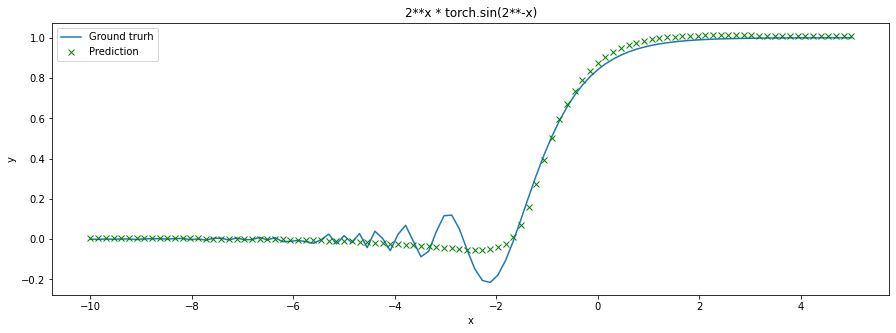

0.02735896408557892


In [ ]:
def predict(net, x, y):
  y_pred = net.forward(x)
  
  # Визуализация тестовых данных
  plt.plot(x.numpy(), y.numpy(), '-', label='Ground trurh')                     
  # Визуализация предсказания нейросети данных
  plt.plot(x.numpy(), y_pred.data.numpy(), 'x', c='g', label='Prediction')      
  plt.title('2**x * torch.sin(2**-x)')
  plt.legend(loc='upper left')
  plt.xlabel('x')
  plt.ylabel('y')                                                             
  plt.show()

# Визуализация работы нейросети
predict(net, x_validation, y_validation)

# Проверка качества нейросети (погрешность)
print(metric(net.forward(x_validation), y_validation).item())

In [ ]:
import random
random.seed(464466656562)

In [ ]:
random.randint(0, 100)

37

**3.6 Семинар: Классификация в PyTorch**

Давайте попрактикуемся с WineNet. Измените архитектуру так, чтобы на вход принимались все 13 признаков и проведите следующие эксперименты:

1. Поэкспериментируйте с количеством нейронов в скрытых слоях. Попробуйте поставить очень маленькое число. Существует ли пороговое значение количества скрытых нейронов, при котором обучение становится невозможным?

2. Попробуйте передавать различные значения test_size в функцию train_test_split. При каком значении test_size сеть предсказывает хуже чем Base Rate*? И какой Base Rate у датасета вин?

3. Зависит ли время обучения на одной эпохе от размера батча? Исследуйте эту зависимость.

Поделитесь своими выводами в комментариях :)

*Base Rate - значение accuracy для случая, когда модель для всех объектов предсказывает самый частотный класс в датасете

In [ ]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [ ]:
wine.data.shape[1]

13

In [ ]:
pd.DataFrame(wine.data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
pd.DataFrame(wine.target).value_counts()

1    71
0    59
2    48
dtype: int64

In [ ]:
base_rate = pd.DataFrame(wine.target).value_counts().max()/pd.DataFrame(wine.target).count()
base_rate

0    0.398876
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        # self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        # self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        # x = self.fc2(x)
        # x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(30)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), 
                             lr=1.0e-3)

In [ ]:
batch_size = 1000

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

#4 Неделя. Методы оптимизации.

**4.4.1 Семинар: Классификация рукописных чисел полносвязанной сетью**

Попрактикуемся с методом reshape. У нас есть трехмерный тензор размерности (6000, 28, 28) . Сопоставьте операцию над этим тензором и её результатат:

In [ ]:
import torch
import random
import numpy as np

In [ ]:
x = torch.tensor(np.random.default_rng(42).random((6000,28,28)))
x.shape

torch.Size([6000, 28, 28])

In [ ]:
x.reshape(-1).shape

torch.Size([4704000])

In [ ]:
x.reshape(-1,1,1).shape

torch.Size([4704000, 1, 1])

In [ ]:
x.reshape(len(x[1]), len(x), len(x[2])).shape

torch.Size([28, 6000, 28])

In [ ]:
x.reshape(-1,14,32,7).shape

torch.Size([1500, 14, 32, 7])

In [ ]:
x.reshape(-1,9).shape

RuntimeError: ignored

In [ ]:
x.reshape(-1,6000).shape

torch.Size([784, 6000])

Проверяем доступность GPU

In [ ]:
torch.cuda.is_available()

False

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

**4.4.5 Семинар: Классификация рукописных чисел полносвязанной сетью**

Запустите код из видео на GPU. В последнем шаге мы рисовали график accuracy и loss на валидации. А что с ними происходит на train'е?

    Постройте на одном графике loss для train и validation.
    Правда ли, что loss на train и validation падает одинаково быстро и выходит на одинаковое значение, или же у нас есть переобучение?
    Ведет ли увеличение количества эпох (40 эпох -> 200 эпох) к улучшению метрик на валидации?
    Замерьте время вычисления 100 эпох на CPU и на GPU. Какое ускорение вы наблюдаете?
    Замедляет ли torch.backends.cudnn.deterministic = True обучение на практике? Если да, то насколько?
    Попробуйте разные методы градиентного спуска, которые были в лекции. Как выбор градиентного спуска влияет на accuracy? Для уверенности лучше проводить один эксперимент 3-5 раз на разных random seed: так вы поймете, действительно ли сказывается влияние метода или дело в случайности.


In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

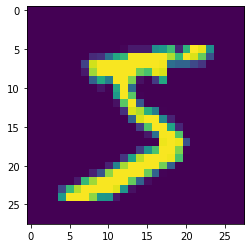

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTNet(torch.nn.Module):

    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

mnist_net = MNISTNet(100)


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
#list(mnist_net.parameters())

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
train_accuracy_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))

    train_accuracy_epoch = []
    train_loss_epoch = []
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        train_loss_epoch.append(loss_value)

        loss_value.backward()
        
        train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean())

        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    train_loss_history.append(torch.stack(train_loss_epoch).float().mean())

    accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
    accuracy_train = torch.stack(train_accuracy_epoch).float().mean()
    test_accuracy_history.append(accuracy_test)
    train_accuracy_history.append(accuracy_train)
    print('epoch = {}, accuracy_test = {}, accuracy_train = {}'.format(epoch, accuracy_test, accuracy_train))

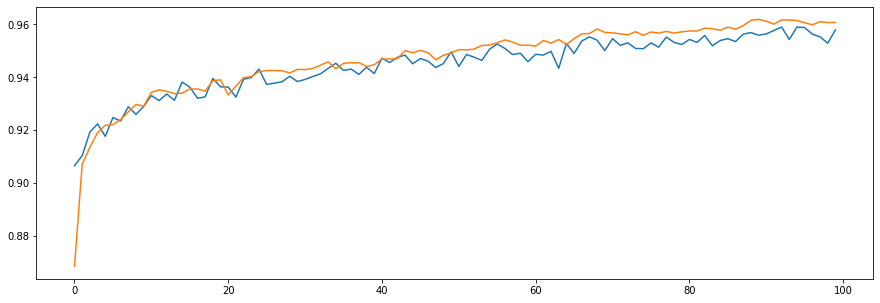

In [ ]:
plt.plot(test_accuracy_history) #blue
plt.plot(train_accuracy_history) #orange

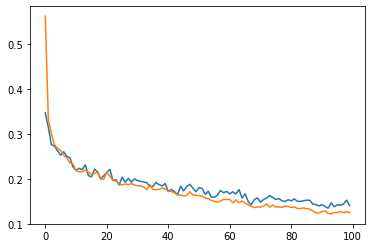

In [ ]:
plt.plot(test_loss_history)  #blue
plt.plot(train_loss_history) #orange

Решение с функцией, для гибкой настройки параметров и профилирования

In [3]:
import torch
import random
import numpy as np

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [4]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [20]:
class MNISTNet(torch.nn.Module):

    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

#Create function
def learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=100, batch_size=100, device='cpu', verbose=True):
    learn_history = {}
    learn_history['accuracy_test'] = []
    learn_history['accuracy_train'] = []
    learn_history['loss_test'] = []
    learn_history['loss_train'] = []
    X_train = MNIST_train.data
    y_train = MNIST_train.targets
    X_test = MNIST_test.data
    y_test = MNIST_test.targets

    X_train = X_train.float()
    X_test = X_test.float()
    X_train = X_train.reshape([-1, 28 * 28])
    X_test = X_test.reshape([-1, 28 * 28])  

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(epoch_num):
        order = np.random.permutation(len(X_train))

        train_accuracy_epoch = []
        train_loss_epoch = []
        
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            
            batch_indexes = order[start_index:start_index+batch_size]
            
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            
            preds = mnist_net.forward(X_batch)
            
            loss_value = loss(preds, y_batch)
            train_loss_epoch.append(loss_value)

            loss_value.backward()
            
            train_accuracy_epoch.append((preds.argmax(dim=1) == y_batch).float().mean())

            optimizer.step()

        test_preds = mnist_net.forward(X_test)
        learn_history['loss_test'].append(loss(test_preds, y_test))
        learn_history['loss_train'].append(torch.stack(train_loss_epoch).float().mean())

        accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
        accuracy_train = torch.stack(train_accuracy_epoch).float().mean()
        learn_history['accuracy_test'].append(accuracy_test)
        learn_history['accuracy_train'].append(accuracy_train)
        if verbose:
            print('epoch = {}, accuracy_test = {:.3f}, accuracy_train = {:.3f}'.format(epoch, accuracy_test, accuracy_train))

    return learn_history

In [91]:
rs=42
random.seed(rs)
np.random.seed(rs)
torch.manual_seed(rs)
torch.cuda.manual_seed(rs)
torch.backends.cudnn.deterministic = True

In [92]:
#%%timeit
device = 'cuda:0'

mnist_net = MNISTNet(100)
mnist_net = mnist_net.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2)
#optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-2, momentum=0.9)

learn_history = learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=100, batch_size=1000, device=device, verbose=True)

print('Accuracy: test = {:.3f}, train = {:.3f}; Loss: test = {:.3f}, train = {:.3f};'.format(learn_history['accuracy_test'][-5].mean(), 
                                                       learn_history['accuracy_train'][-5].mean(),
                                                       learn_history['loss_test'][-5].mean(), 
                                                       learn_history['loss_train'][-5].mean()))

epoch = 0, accuracy_test = 0.894, accuracy_train = 0.786
epoch = 1, accuracy_test = 0.912, accuracy_train = 0.901
epoch = 2, accuracy_test = 0.921, accuracy_train = 0.915
epoch = 3, accuracy_test = 0.926, accuracy_train = 0.923
epoch = 4, accuracy_test = 0.929, accuracy_train = 0.929
epoch = 5, accuracy_test = 0.933, accuracy_train = 0.934
epoch = 6, accuracy_test = 0.936, accuracy_train = 0.937
epoch = 7, accuracy_test = 0.939, accuracy_train = 0.941
epoch = 8, accuracy_test = 0.940, accuracy_train = 0.943
epoch = 9, accuracy_test = 0.940, accuracy_train = 0.945
epoch = 10, accuracy_test = 0.943, accuracy_train = 0.946
epoch = 11, accuracy_test = 0.942, accuracy_train = 0.949
epoch = 12, accuracy_test = 0.944, accuracy_train = 0.950
epoch = 13, accuracy_test = 0.947, accuracy_train = 0.951
epoch = 14, accuracy_test = 0.948, accuracy_train = 0.952
epoch = 15, accuracy_test = 0.950, accuracy_train = 0.954
epoch = 16, accuracy_test = 0.949, accuracy_train = 0.956
epoch = 17, accuracy_tes

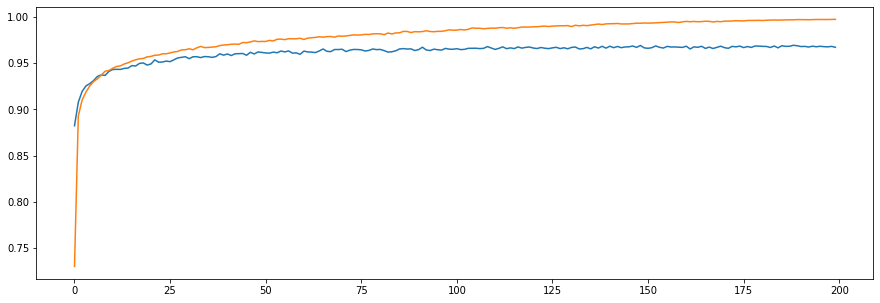

In [74]:
plt.plot(learn_history['accuracy_test']) #blue
plt.plot(learn_history['accuracy_train']) #orange

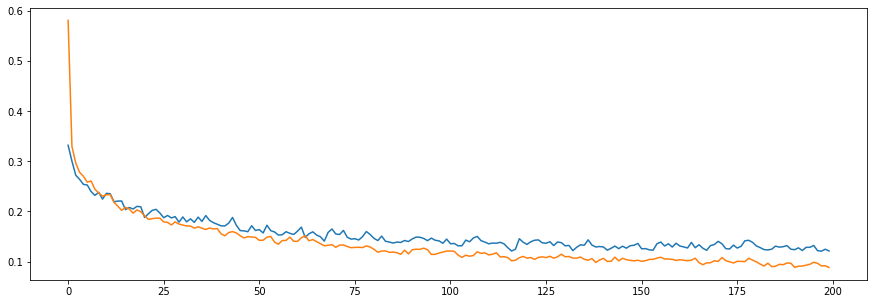

In [30]:
plt.plot(learn_history['loss_test'])  #blue
plt.plot(learn_history['loss_train']) #orange

In [ ]:
# Постройте на одном графике loss для train и validation. 
# - построил


# Правда ли, что loss на train и validation падает одинаково быстро и выходит на одинаковое значение, или же у нас есть переобучение? 
# - нет, переобучения не замечено, падает одинаково


# Ведет ли увеличение количества эпох (40 эпох -> 200 эпох) к улучшению метрик на валидации?
# - да, ведет, до 100 однозначно видно улучшение метрик, со 100 до 200 рост значительно замедляется, но все же еще есть (сотые)

# Замерьте время вычисления 100 эпох на CPU и на GPU. Какое ускорение вы наблюдаете?
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=100, device='cuda:0', verbose=True) - 1 loop, best of 5: 12.7 s per loop
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=100, device='cpu', verbose=True) - 1 loop, best of 5: 20.5 s per loop
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=1000, device='cuda:0', verbose=True) - 1 loop, best of 5: 2.1 s per loop
# - learn_MNISTNet(mnist_net, loss, optimizer, epoch_num=10, batch_size=1000, device='cpu', verbose=True) - 1 loop, best of 5: 11.3 s per loop
# Вывод: очень существенно сказывается на выигрыше по скорости размер батча, при батче 100 выигрыш GPU в 2 раза, при батче 1000 выигрыш GPU в 5 раз
#        еще более сущетсвенная (на порядки) разница, наблюдается разница при увеличении кол-ва нейронов скрытых слоев, например до 1000


# Замедляет ли torch.backends.cudnn.deterministic = True обучение на практике? Если да, то насколько?
# - deterministic=True (neurons = 1000, batch = 1000, epoch = 10): 1 loop, best of 5: 2.58 s per loop
# - deterministic=False (neurons = 1000, batch = 1000, epoch = 10): 1 loop, best of 5: 2.59 s per loop
# Вывод, разницы не замечено

# Попробуйте разные методы градиентного спуска, которые были в лекции. Как выбор градиентного спуска влияет на accuracy? Для уверенности лучше 
# проводить один эксперимент 3-5 раз на разных random seed: так вы поймете, действительно ли сказывается влияние метода или дело в случайности.
# neurons = 100, batch = 1000, epoch=100, Adam(lr = 0.001) ----> Accuracy: test = 0.966, train = 0.978; Loss: test = 0.112, train = 0.072;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.001) ----> Accuracy: test = 0.902, train = 0.902; Loss: test = 0.484, train = 0.484;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.01) ----> Accuracy: test = 0.936, train = 0.957; Loss: test = 0.219, train = 0.163;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.01, momentum=0.9) ---> Accuracy: test = 0.965, train = 0.985; Loss: test = 0.111, train = 0.061;
# neurons = 100, batch = 1000, epoch=100, SGD(lr = 0.01, momentum=0.1) ---> Accuracy: test = 0.938, train = 0.959; Loss: test = 0.214, train = 0.156;

**4.4.6 Семинар: Классификация рукописных чисел полносвязанной сетью**

Как было сказано в предыдущем уроке, полносвязный слой может быть представлен как матричное умножение матрицы входов (X) и матрицы весов нейронов слоя (W), плюс вектор bias'ов слоя (b). 

В документации к классу torch.nn.Linear (полносвязному слою) написано следующее: Applies a linear transformation to the incoming data: y=xAT+by = xA^T + by=xAT+b . А здесь – это то, как PyTorch хранит веса слоя. Но чтобы эта матрица совпала с W из предыдущего урока, нужно её сперва транспонировать.

Давайте реализуем функциональность torch.nn.Linear и сверим с оригиналом!

Пусть у нас будет 1 объект x на входе с двумя компонентами. Его мы передадим в полносвязный слой с 3-мя нейронами и получим, соотсветственно, 3 выхода. После напишем эту же функциональность с помощью матричного умножения. 

In [94]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w
fc.weight.data

tensor([[11., 12.],
        [21., 22.],
        [31., 32.]])

In [99]:
fc.weight.data.transpose(0,1)

tensor([[11., 21., 31.],
        [12., 22., 32.]])

In [95]:
b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b
fc.bias.data

tensor([[31., 32., 33.]])

In [96]:
# Получим выход fc-слоя:
fc_out = fc(x)
fc_out

tensor([[381., 682., 983.]], grad_fn=<AddmmBackward0>)

In [101]:
# Попробуем теперь получить аналогичные выходы с помощью матричного перемножения:
fc_out_alternative =  x @ w.t() + b
fc_out_alternative

# Проверка осуществляется автоматически вызовом функции
# print(fc_out == fc_out_alternative)
# (раскомментируйте, если решаете задачу локально)

tensor([[381., 682., 983.]])

В предыдущем шаге мы написали функцию, эмулирующую fc-слой. Проверим, что по ней правильно считается градиент. 

Функцию backward() в PyTorch можно посчитать только от скалярной функции (выход из такой функции – одно число). Это логично, так как loss-функция выдает всегда одно число. Но fc-слой, который мы проэмулировали, имел 3 выхода. Предлагаем их просуммировать, чтобы получить в итоге скалярную функцию. Заметим, впрочем, что можно было бы выбрать любую агрегирующую операцию, например умножение.

Дополните код так, чтобы градиент по весам и смещениям (bias) совпадал с аналогичным градиентом в вашей фунции.

Чем обусловлен полученный градиент? Изменится ли он, если мы подадим другие входы или другую инициализацию весов?

In [3]:
import torch

# Сперва создадим тензор x:
x = torch.tensor([[10., 20.]])

# Оригинальный полносвязный слой с 2-мя входами и 3-мя нейронами (выходами):
fc = torch.nn.Linear(2, 3)

# Веса fc-слоя хранятся в fc.weight, а bias'ы соответственно в fc.bias
# fc.weight и fc.bias по умолчанию инициализируются случайными числами

# Давайте проставим свои значения в веса и bias'ы:
w = torch.tensor([[11., 12.], [21., 22.], [31., 32]])
fc.weight.data = w

b = torch.tensor([[31., 32., 33.]])
fc.bias.data = b

# Получим выход fc-слоя:
fc_out = fc(x)
# Просуммируем выход fc-слоя, чтобы получить скаляр:
fc_out_summed = fc_out.sum()

# Посчитаем градиенты формулы fc_out_summed:
fc_out_summed.backward()
weight_grad = fc.weight.grad
bias_grad = fc.bias.grad

# Ok, теперь воспроизведем вычисления выше но без fc-слоя:
# Проставим, что у "w" и "b" нужно вычислять градиенты (для fc-слоя это произошло автоматически):
w.requires_grad_(True)
b.requires_grad_(True)

# Получим выход нашей формулы:
our_formula = (x @ w.t() + b).sum() # SUM{x * w^T + b}

# Сделайте backward для нашей формулы:
our_formula.backward()

# Проверка осуществляется автоматически, вызовом функций:
print('fc_weight_grad:', weight_grad)
print('our_weight_grad:', w.grad)
print('fc_bias_grad:', bias_grad)
print('out_bias_grad:', b.grad)
# (раскомментируйте, если работаете над задачей локально)

fc_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
our_weight_grad: tensor([[10., 20.],
        [10., 20.],
        [10., 20.]])
fc_bias_grad: tensor([[1., 1., 1.]])
out_bias_grad: tensor([[1., 1., 1.]])


#Неделя 5. Сверточные нейронные сети